In [44]:
# Combine the following two DataFrames

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}

df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [45]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [46]:
df_job_company = df_jobs.merge(df_companies, on='company_name')
df_job_company

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [47]:

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


df_US = df[df['job_country'] == 'United States'].copy()

df_US['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')
#df_US['job_posted_month'] = df['job_posted_date'].dt.to_period('M')
df_US.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April


In [48]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [49]:
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,565,40,6049,2801,4867,51,1025,781,991,112
1,August,903,39,6634,3269,6318,68,1186,903,1515,194
2,December,648,40,3979,2641,3472,119,601,689,752,212
3,February,447,24,6124,3060,4956,56,1258,878,1127,90
4,January,527,36,8494,2655,6915,60,1544,773,1552,114
5,July,581,39,5201,2570,4876,65,883,747,1095,153
6,June,446,32,5683,2893,4645,48,1009,812,1033,93
7,March,438,19,6218,3183,4779,59,1114,829,1150,115
8,May,279,20,4993,2976,4377,49,839,746,914,90
9,November,719,36,4531,2793,4175,132,656,684,816,194


In [50]:
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,job_posted_month_no
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
2,December,648,40,3979,2641,3472,119,601,689,752,212,12
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
9,November,719,36,4531,2793,4175,132,656,684,816,194,11


In [51]:
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,job_posted_month_no
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
11,September,897,50,4639,3224,4568,113,805,775,1014,228,9
10,October,932,48,5271,3015,4882,101,871,672,987,219,10


In [52]:
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,job_posted_month_no
job_posted_month,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,1
February,447,24,6124,3060,4956,56,1258,878,1127,90,2
March,438,19,6218,3183,4779,59,1114,829,1150,115,3
April,565,40,6049,2801,4867,51,1025,781,991,112,4
May,279,20,4993,2976,4377,49,839,746,914,90,5
June,446,32,5683,2893,4645,48,1009,812,1033,93,6
July,581,39,5201,2570,4876,65,883,747,1095,153,7
August,903,39,6634,3269,6318,68,1186,903,1515,194,8
September,897,50,4639,3224,4568,113,805,775,1014,228,9


In [53]:
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [54]:
# DataFrame for other Tech jobs

import random

# Set seed for reproducibility
random.seed(42)

# Define job titles
job_titles = ['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer', 'UI/UX Designer']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Front-End Developer': (11000, 15000),
    'Back-End Developer': (8000, 10000),
    'Full-Stack Developer': (5000, 7500),
    'UI/UX Designer': (4000, 5000)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_US_software_pivot = pd.DataFrame(data, index=months)
df_US_software_pivot.index.name = "job_posted_month"

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [55]:
# Combine the above two DataFrames

df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')
df_US_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


In [56]:
# Plot the merged DataFrames

# First find the top 5 jobs

top_5 = (df_US_merged
         .sum()  # sum all the jobs for each month
         .sort_values(ascending=False)  # sort them in descending order so as to get the highest numbers at top
         .head()  # get the top 5 jobs (by default it is 5)
         .index 
         )
top_5 = top_5.tolist()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

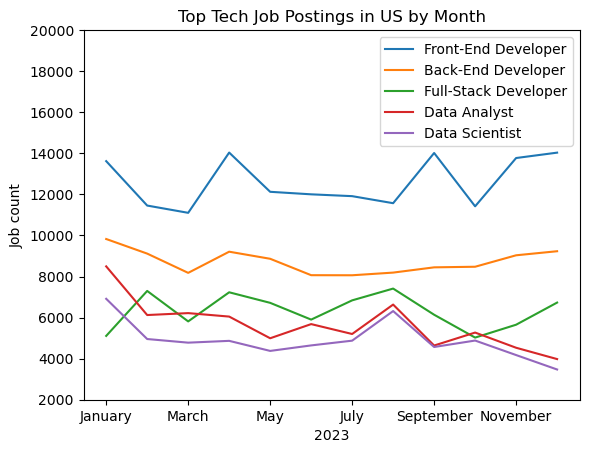

In [57]:
df_US_merged[top_5].plot(kind='line')
plt.title('Top Tech Job Postings in US by Month')
plt.xlabel('2023')
plt.ylabel('Job count')
plt.legend()
plt.ylim(2000, 20000)
plt.show()

## Problems

In [58]:
# 1_Problem Statement:
# Create a DataFrame df_us_jobs that contains job postings in the United States.
# Then create another DataFrame df_monthly_postings that counts the number of job postings for each month.
# Merge these two DataFrames on the job_posted_month column using a right join and display the first 5 rows of the resulting DataFrame.

df_US_jobs = df[df['job_country'] == 'United States'].copy()
df_US_jobs['job_posted_month'] = df_US_jobs['job_posted_date'].dt.to_period('M')

#df_US_jobs.head()

df_US_month = df_US_jobs.groupby('job_posted_month').size().reset_index(name='postings_count')
#df_US_month.head()
df_merged = pd.merge(df_US_jobs, df_US_month, on='job_posted_month', how='right')
df_merged.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,postings_count
0,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023-01,22670
1,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023-01,22670
2,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",2023-01,22670
3,Data Engineer,Data Engineer,"Cincinnati, OH",via SimplyHired,Full-time,False,"Texas, United States",2023-01-22 13:08:53,False,False,United States,None,NaN,NaN,Divisions Maintenance Group,"['sql', 'nosql', 'python', 'java', 'c++', 'sca...","{'databases': ['cassandra'], 'libraries': ['ha...",2023-01,22670
4,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"['sql', 'python', 'unix', 'excel', 'jira']","{'analyst_tools': ['excel'], 'async': ['jira']...",2023-01,22670


In [60]:
# 2_Problem Statement:
# Create a DataFrame df_not_remote_jobs that filters job postings that do not offer remote work.
# Then create another DataFrame df_not_remote_salary that calculates the average yearly salary for these non-remote jobs. 
# Rename this salary column salary_not_remote_avg.
# Merge these two DataFrames on the job_title_short column using a right join and display the first 5 rows of the resulting DataFrame.

df_not_remote_jobs = df[df['job_work_from_home'] == False]
df_not_remote_salary = df_not_remote_jobs.groupby('job_title_short')['salary_year_avg'].mean().reset_index()
df_not_remote_salary.rename(columns={'salary_year_avg': 'salary_not_remaote_avg'}, inplace=True)
merged_df = pd.merge(df_not_remote_jobs, df_not_remote_salary, on='job_title_short', how='right')
merged_df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,salary_not_remaote_avg
0,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",90177.41994
1,Business Analyst,Business Intelligence Intern,"Dallas, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 13:02:07,False,False,United States,None,NaN,NaN,Copart,"['r', 'python', 'sql', 'tableau', 'power bi']","{'analyst_tools': ['tableau', 'power bi'], 'pr...",90177.41994
2,Business Analyst,BI Engineer,Namibia,via Intellijobs.ai,Full-time,False,Namibia,2023-03-05 14:10:49,False,False,Namibia,None,NaN,NaN,Innover,"['sql', 'gcp', 'looker', 'tableau']","{'analyst_tools': ['looker', 'tableau'], 'clou...",90177.41994
3,Business Analyst,Business Analyst,"Tel Aviv-Yafo, Israel",via Comeet,Full-time,False,Israel,2023-09-05 13:50:12,False,False,Israel,None,NaN,NaN,ironSource,"['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",90177.41994
4,Business Analyst,Commercial Analyst,South Africa,via LinkedIn,Full-time,False,South Africa,2023-02-14 13:36:23,True,False,South Africa,None,NaN,NaN,PEP,"['sql', 'tableau', 'spss', 'sap']","{'analyst_tools': ['tableau', 'spss', 'sap'], ...",90177.41994


In [61]:
# 3_Problem Statement:
# Create a DataFrame df_company_salary that calculates the average yearly salary for each company.
# Then, create another DataFrame df_company_remote that counts the number of remote job postings for each company. 
# Name this count column remote_count.
# Merge these two DataFrames on the company_name column using an inner join and display the first 5 rows of the resulting DataFrame.

df_company_salary = df.groupby('company_name')['salary_year_avg'].mean().reset_index()
df_company_remote = df[df['job_work_from_home'] == True].groupby('company_name').size().reset_index(name='remote_count')
merged_df = pd.merge(df_company_salary, df_company_remote, on='company_name', how='inner')
merged_df.head()

,company_name,salary_year_avg,remote_count
0,#EqualsTrue,NaN,4
1,#TeamGoHealth,NaN,1
2,#twiceasnice Recruiting,77750.0,1
3,&Work,NaN,1
4,"(AEG) Application Engineering Group, Inc.",NaN,1
